# Breadth First Search (BFS)

Define the graph as adjacency list.

In [1]:
node_list = ["A", "B", "C", "D", "E", "F"]


graph = {
    "A" : ["B", "C"],
    "B" : ["D", 'E'],
    "C" : ["E", "F"],
    "D": [],
    "E": ["F"],
    "F": []
    }

print(graph)

{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['E', 'F'], 'D': [], 'E': ['F'], 'F': []}


Global variables and data structures for BFS

In [2]:
color = {}
distance = {}
parent = {}
for node in graph:
    color[node] = "white"
    distance[node] = float("inf")
    parent[node] = None

print(color)
print(distance)
print(parent)

{'A': 'white', 'B': 'white', 'C': 'white', 'D': 'white', 'E': 'white', 'F': 'white'}
{'A': inf, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf}
{'A': None, 'B': None, 'C': None, 'D': None, 'E': None, 'F': None}


Visualize the graph

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

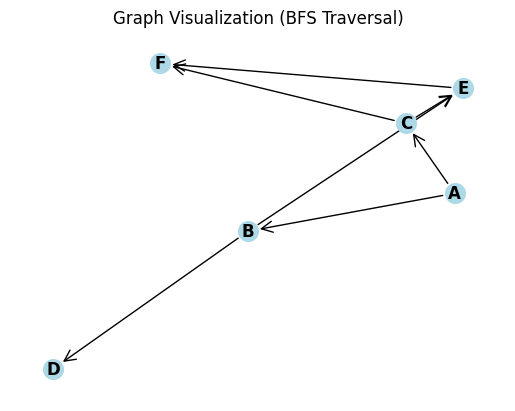

In [4]:
G = nx.DiGraph()

# Add edges
for u in graph:
    for v in graph[u]:
        G.add_edge(u, v)

# Define positions (spring_layout auto-arranges nicely)
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200)

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

plt.title("Graph Visualization (BFS Traversal)")
plt.axis("off")
plt.show()

BFS code

In [6]:
from collections import deque

def bfs(start, graph):
    color[start] = "gray"
    distance[start] = 0
    parent[start] = None


    Q = deque() #frontier
    Q.append(start)
    while Q:
        curr = Q.popleft()
        for n in graph[curr]:
            if color[n] == "white":
                color[n] ="gray"
                distance[n] = distance[curr]+1
                parent[n] = curr
                Q.append(n)
        color[curr] = "black"
    return parent , distance, color

bfs("A", graph)

({'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'},
 {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2},
 {'A': 'black',
  'B': 'black',
  'C': 'black',
  'D': 'black',
  'E': 'black',
  'F': 'black'})

Visualize the BFS tree

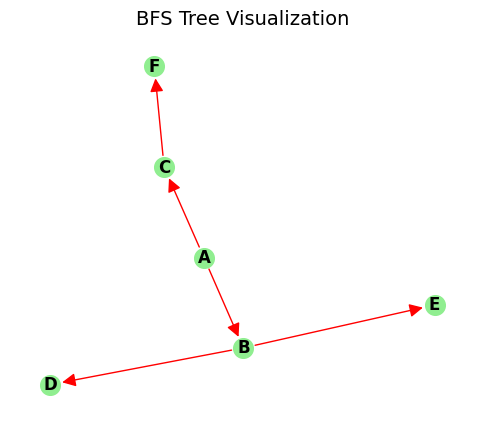

In [7]:
BFS_tree = nx.DiGraph()
for node, p in parent.items():
    if p is not None:
        BFS_tree.add_edge(p, node)

# --- Draw BFS Tree ---
pos = nx.spring_layout(BFS_tree, seed=42)  # layout for nice positioning

plt.figure(figsize=(6, 5))
nx.draw_networkx_nodes(BFS_tree, pos, node_color="lightgreen", node_size=200)
nx.draw_networkx_edges(BFS_tree, pos, edge_color="red", arrows=True, arrowsize=20)
nx.draw_networkx_labels(BFS_tree, pos, font_size=12, font_weight="bold")

plt.title("BFS Tree Visualization", fontsize=14)
plt.axis("off")
plt.show()
